In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = pd.read_csv('../input/iris/Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
del iris['Id']
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.shape

(150, 5)

In [7]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

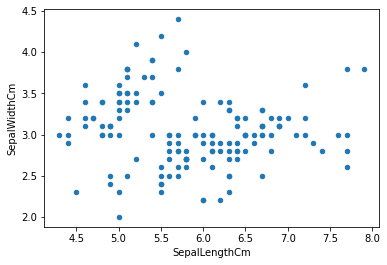

In [9]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')

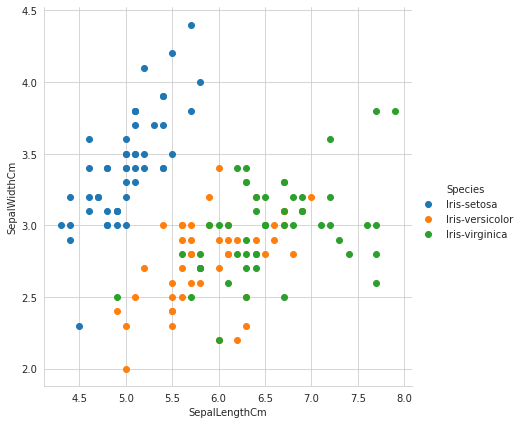

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue='Species', height=6).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

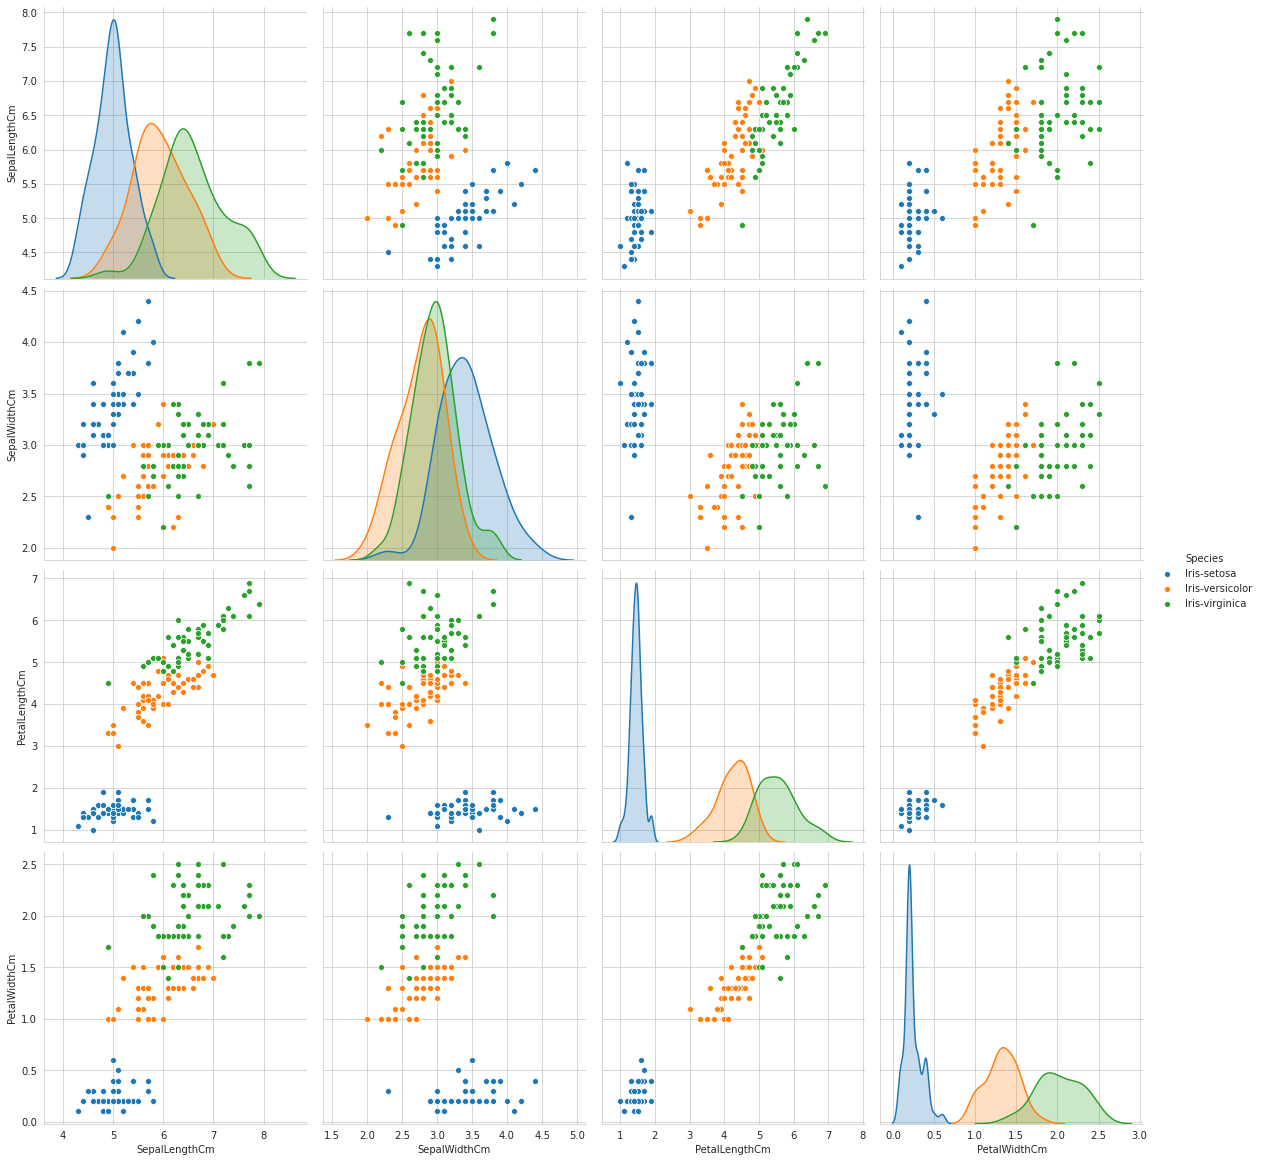

In [11]:
sns.pairplot(iris, hue='Species', height=4)

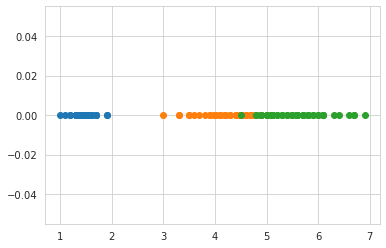

In [12]:
iris_setosa = iris.loc[iris['Species'] == 'Iris-setosa']
iris_versicolor = iris.loc[iris['Species'] == 'Iris-versicolor']
iris_virginica = iris.loc[iris['Species'] == 'Iris-virginica']
plt.plot(iris_setosa['PetalLengthCm'], np.zeros_like(iris_setosa['PetalLengthCm']), 'o')
plt.plot(iris_versicolor['PetalLengthCm'], np.zeros_like(iris_versicolor['PetalLengthCm']), 'o')
plt.plot(iris_virginica['PetalLengthCm'], np.zeros_like(iris_virginica['PetalLengthCm']), 'o')

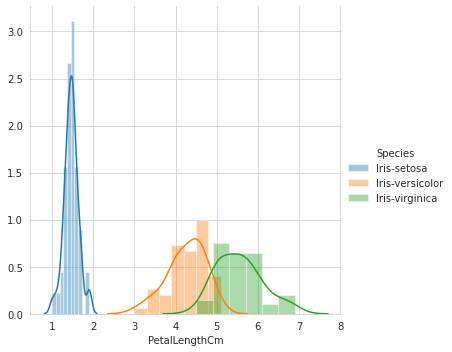

In [13]:
sns.FacetGrid(iris, hue='Species', height=5).map(sns.distplot, 'PetalLengthCm').add_legend()

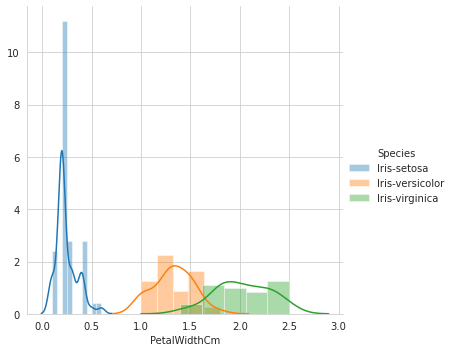

In [14]:
sns.FacetGrid(iris, hue='Species', height=5).map(sns.distplot, 'PetalWidthCm').add_legend()

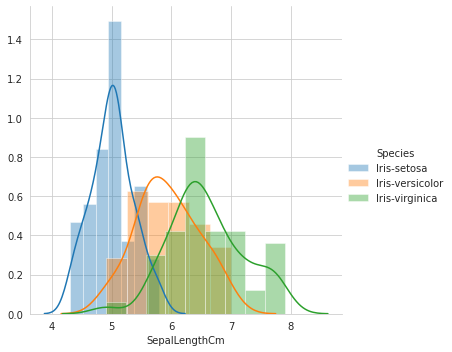

In [15]:
sns.FacetGrid(iris, hue='Species', height=5).map(sns.distplot, 'SepalLengthCm').add_legend()

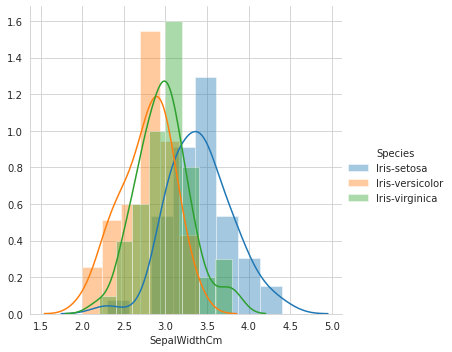

In [16]:
sns.FacetGrid(iris, hue='Species', height=5).map(sns.distplot, 'SepalWidthCm').add_legend()

In [17]:
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density=True)
pdf = counts/(sum(counts))
print("PDF : ",pdf)
print("Bin_edges : ", bin_edges)

PDF :  [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
Bin_edges :  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


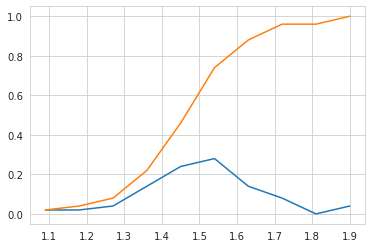

In [18]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

In [19]:
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, density=True)
pdf = counts/ (sum(counts))
print("PDF : ", pdf)
print("Bin_Edges : ",bin_edges)

PDF :  [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
Bin_Edges :  [3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


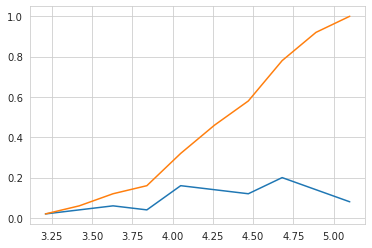

In [20]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

In [21]:
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, density=True)
pdf = counts/ (sum(counts))
print("PDF : ", pdf)
print("Bin_Edges : ",bin_edges)

PDF :  [0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
Bin_Edges :  [4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


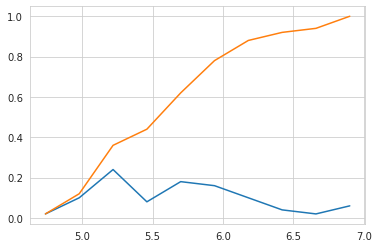

In [22]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

In [23]:
print("Mean petal length of each :")
print("Setosa : ", np.mean(iris_setosa['PetalLengthCm']))
print("Versicolor : ", np.mean(iris_versicolor['PetalLengthCm']))
print("Virginica : ", np.mean(iris_virginica['PetalLengthCm']))

print("\nMedian petal length of each :")
print("Setosa : ", np.median(iris_setosa['PetalLengthCm']))
print("Versicolor : ", np.median(iris_versicolor['PetalLengthCm']))
print("Virginica : ", np.median(iris_virginica['PetalLengthCm']))

print("\nQunatiles [0%, 25%, 50%, 75%, 100%]for petal length of each :")
print("Setosa : ", np.percentile(iris_setosa['PetalLengthCm'],np.arange(0,101,25)))
print("Versicolor : ", np.percentile(iris_versicolor['PetalLengthCm'], np.arange(0,101, 25)))
print("Virginica : ", np.percentile(iris_virginica['PetalLengthCm'], np.arange(0,101,25)))

Mean petal length of each :
Setosa :  1.464
Versicolor :  4.26
Virginica :  5.552

Median petal length of each :
Setosa :  1.5
Versicolor :  4.35
Virginica :  5.55

Qunatiles [0%, 25%, 50%, 75%, 100%]for petal length of each :
Setosa :  [1.    1.4   1.5   1.575 1.9  ]
Versicolor :  [3.   4.   4.35 4.6  5.1 ]
Virginica :  [4.5   5.1   5.55  5.875 6.9  ]


In [24]:
from statsmodels import robust
print("\nMedian Absolute Deviation (MAD) for petal length of each :")
print("Setosa : ", robust.mad(iris_setosa['PetalLengthCm']))
print("Versicolor : ", robust.mad(iris_versicolor['PetalLengthCm']))
print("Virginica : ", robust.mad(iris_virginica['PetalLengthCm']))


Median Absolute Deviation (MAD) for petal length of each :
Setosa :  0.14826022185056031
Versicolor :  0.5189107764769602
Virginica :  0.6671709983275211


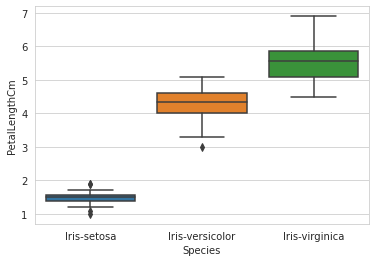

In [25]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

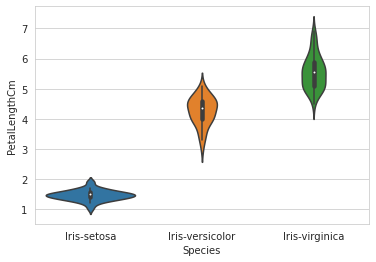

In [26]:
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

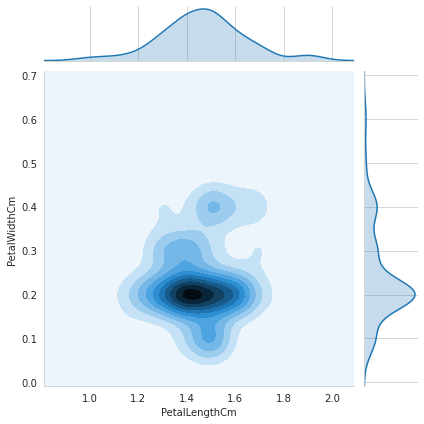

In [27]:
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=iris_setosa, kind='kde')

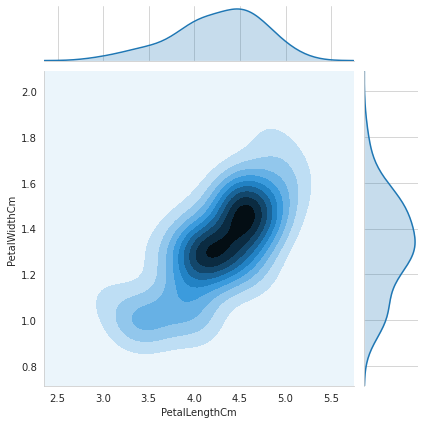

In [28]:
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=iris_versicolor, kind='kde')

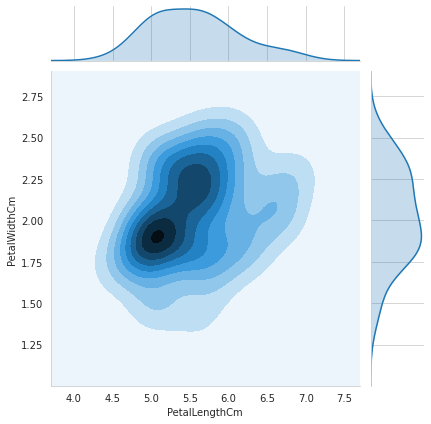

In [29]:
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=iris_virginica, kind='kde')